# Введение в анализ данных

## Векторизированные вычисления с помощью NumPy - Модуль 2-1  Модуль 2. Библиотека Pandas и Numpy / Введение в анализ данных-19
Создайте вектор NumPy, который содержит значения от 10 до 500. Возведите все значения вектора в квадрат и вычтите из каждого элемента вектора число 234. Чему равна сумма всех элементов получившегося вектора?

In [91]:
import numpy as np


arr = np.arange(start=10, stop=501)
arr = np.power(arr, 2) # arr *= arr
arr -= 234
res = np.sum(arr)

In [92]:
arr

array([  -134,   -113,    -90,    -65,    -38,     -9,     22,     55,
           90,    127,    166,    207,    250,    295,    342,    391,
          442,    495,    550,    607,    666,    727,    790,    855,
          922,    991,   1062,   1135,   1210,   1287,   1366,   1447,
         1530,   1615,   1702,   1791,   1882,   1975,   2070,   2167,
         2266,   2367,   2470,   2575,   2682,   2791,   2902,   3015,
         3130,   3247,   3366,   3487,   3610,   3735,   3862,   3991,
         4122,   4255,   4390,   4527,   4666,   4807,   4950,   5095,
         5242,   5391,   5542,   5695,   5850,   6007,   6166,   6327,
         6490,   6655,   6822,   6991,   7162,   7335,   7510,   7687,
         7866,   8047,   8230,   8415,   8602,   8791,   8982,   9175,
         9370,   9567,   9766,   9967,  10170,  10375,  10582,  10791,
        11002,  11215,  11430,  11647,  11866,  12087,  12310,  12535,
        12762,  12991,  13222,  13455,  13690,  13927,  14166,  14407,
      

In [93]:
res

41676571

## Series и DataFrame, Объединение таблиц - Модуль 2-2 Модуль 2. Библиотека Pandas и Numpy / Введение в анализ данных-19
## файл содержит таблицу, которая состоит из следующих колонок:
    - data (дата);
    - vendor_id (уникальный идентификатор ресторана);
    - chain_id (уникальный идентификатор сети в которую входит ресторан);
    - city_id (идентификатор города);
    - spec (специализация ресторана);
    - succsseful_orders (количество успешных заказов);
    - fail_orders (количество неудачных заказов).

## Вопросы
1. Сколько уникальных городов представленно в данном датафрейме?
2. Сколько ресторанов в таблице специализируется на рыбе?
3. Сколько колонок в датафрейме имеют тип данных float64?
4. Сколько дней у ресторана с идентификатором 40065 было менее 20 успешных заказов?

In [94]:
import pandas as pd

In [95]:
df = pd.read_csv('/Users/igorvoinov/algo/pro2_m4y1/orders.csv')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96118 entries, 0 to 96117
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               96118 non-null  object 
 1   vendor_id          96118 non-null  int64  
 2   chain_id           96118 non-null  int64  
 3   city_id            96118 non-null  int64  
 4   spec               95733 non-null  object 
 5   successful_orders  96118 non-null  float64
 6   fail_orders        96118 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.1+ MB


In [97]:
df.head()

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Суши,54.0,1.0
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0
4,2019-09-21,43919,30984,25,Суши,6.0,0.0


In [98]:
"""
Где df - это ваш датафрейм, а 'город' - это название столбца с городами в вашем датафрейме. Метод nunique() 
возвращает количество уникальных значений в указанном столбце. Печатая num_unique_cities, вы увидите количество 
уникальных городов в датафрейме.
"""
# len(set(df['city_id']))
df['city_id'].nunique()

4

In [99]:
df[df['spec'] == 'Рыба']['vendor_id'].nunique()

18

In [100]:
# df.select_dtypes(include=['float64']).shape[1]
# df.shape[1]
# df.dtypes[df.dtypes == 'float64']
df.dtypes[df.dtypes == 'float64'].shape[0]

2

In [101]:
restaurant_id = 40065
threshold = 20

filtered_df = df[df['vendor_id'] == restaurant_id]
days_below_threshold = (filtered_df['successful_orders'] < threshold).sum()
print(days_below_threshold)

45


## Практика и Q&A-сессия с экспертом VK по курсу "Введение в анализ данных" после 3 модуля

## Вопросы:
- выведите максимальный размер пополнения в долларах начиная с 8 февраля;
- выведите средний размер пополнения за февраль подневно, в разбивке по валютам (с округлением до целого числа);
- подсчитайте долю клиентов, у которых были пополнения в нескольких валютах (ответ округлите до десятых процента);
- по каждому клиенту вывести дату первого пополнения, валюту, сумму в рублях (ответом выведите общую сумму в рублях по всем клиентам);
- подсчитайте по каждому клиенту среднюю разницу в днях между его пополнениями, выведите медианное значение по всем клиентам.

In [102]:
import pandas as pd
import numpy as np

In [103]:
df1 = pd.read_excel('./modules1_3/table1.xlsx')
df2 = pd.read_excel('./modules1_3/table2.xlsx')

In [104]:
df1

,operation_id,user_id,volume,currency,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38
...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21


In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26021 entries, 0 to 26020
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   operation_id    26021 non-null  int64  
 1   user_id         26021 non-null  int64  
 2   volume          26021 non-null  float64
 3   currency        26021 non-null  object 
 4   operation_date  26021 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1016.6+ KB


In [106]:
df2

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,4217-10-01 00:00:00,2023-02-06
1,EUR,RUB,76.7344,2023-02-06
2,GEL,RUB,26.5863,2023-02-06
3,USD,RUB,70.3847,2023-02-06
4,CNY,RUB,3815-10-01 00:00:00,2023-02-07
5,EUR,RUB,76.0347,2023-02-07
6,GEL,RUB,26.7006,2023-02-07
7,USD,RUB,70.5991,2023-02-07
8,CNY,RUB,4331-10-01 00:00:00,2023-02-08
9,EUR,RUB,75.9087,2023-02-08


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rate_currency         28 non-null     object        
 1   rate_countercurrency  28 non-null     object        
 2   rate_value            28 non-null     object        
 3   rate_date             28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.0+ KB


In [108]:
df1['operation_date'] = pd.to_datetime(df1['operation_date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26021 entries, 0 to 26020
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   operation_id    26021 non-null  int64         
 1   user_id         26021 non-null  int64         
 2   volume          26021 non-null  float64       
 3   currency        26021 non-null  object        
 4   operation_date  26021 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1016.6+ KB


In [109]:
df1['operation_day'] = df1['operation_date'].dt.floor('d')
df1

,operation_id,user_id,volume,currency,operation_date,operation_day
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09
...,...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08


array([[<Axes: title={'center': 'operation_day'}>]], dtype=object)

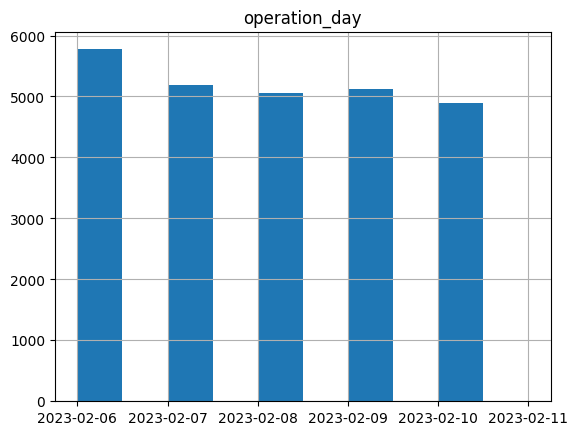

In [116]:
df1.hist('operation_day') # ?

In [114]:
selected_data1 = df1[df1['operation_date'] > pd.to_datetime('2023-02-08')]

In [112]:
selected_data1[selected_data1['currency'] == 'USD'].max()

operation_id                 14115836
user_id                     123071804
volume                      1800000.0
currency                          USD
operation_date    2023-02-11 22:52:18
operation_day     2023-02-11 00:00:00
dtype: object

In [113]:
# ответ на 1 задачу
selected_data1.loc[
    (selected_data1['operation_date'] >= pd.Timestamp("2023-02-08"))
    & (selected_data1['currency'] == "USD"), 'volume'].max()

1800000.0